In [16]:
import pandas as pd

In [17]:
train_data = pd.read_csv('train_titanic.csv')
train_data.shape



(891, 12)

In [18]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train_data.drop(['Cabin','Ticket','Embarked','Name','Fare'],axis=1,inplace=True)

In [20]:
train_y = train_data.Survived
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [21]:
#train_data.drop(['Survived'],axis=1,inplace=True)
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [22]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [23]:
values ={'Age':0.5}
train_data.fillna(value=values,inplace=True).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [24]:
test_data=pd.read_csv('test _titanic.csv')
test_data.drop(['Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [25]:
test_data.head()
test_data.fillna(value={'Age':0.5},inplace=True).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [26]:
data =[train_data,test_data]
for ds in data:
    ds['FamSize'] = ds['SibSp']+ds['Parch']+1
m = {'m':1,'f':0}
train_data['Sex'] = train_data['Sex'].str[0].map(m)
test_data['Sex'] = test_data['Sex'].str[0].map(m)



    


In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,FamSize
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,2
2,3,1,3,0,26.0,0,0,1
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,1


In [28]:
test_data.head()
test_data.drop(['Fare'],axis=1).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,FamSize
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,1
4,896,3,0,22.0,1,1,3


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


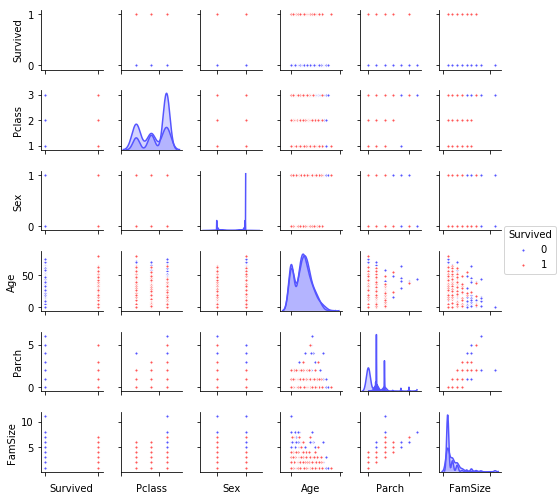

In [29]:
import seaborn as sns
g = sns.pairplot(train_data[[ u'Survived',u'Pclass', u'Sex', u'Age', u'Parch',
       u'FamSize']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [30]:
train_data.drop(['Survived'],axis=1,inplace=True)

In [31]:
from sklearn.tree import DecisionTreeClassifier as dtc
model = dtc()
model.fit(train_data,train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,3


In [33]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,FamSize
0,1,3,1,22.0,1,0,2
1,2,1,0,38.0,1,0,2
2,3,3,0,26.0,0,0,1
3,4,1,0,35.0,1,0,2
4,5,3,1,35.0,0,0,1


In [36]:
test_data.drop(['Fare'],axis=1,inplace=True)


In [39]:
preddtc= model.predict(test_data)

In [40]:
from sklearn.neighbors import KNeighborsClassifier as kc
modelk = kc()
modelk.fit(train_data,train_y)
predkc = modelk.predict(test_data)

In [45]:
PassengerId = test_data.PassengerId
submission = pd.DataFrame({'PassengerId':PassengerId,'Survived':preddtc})
submission.to_csv('TitanicSubmission.csv',index=False)